# Probability & Inference
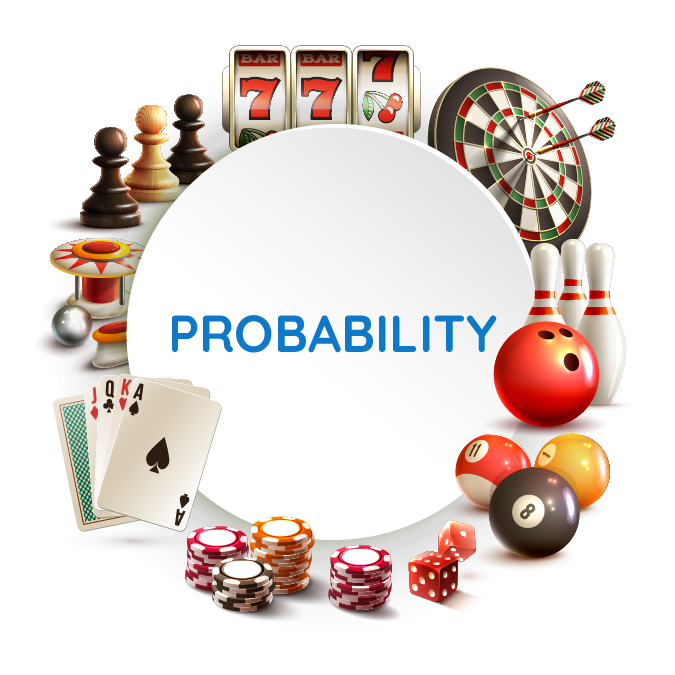


The world is full of uncertainty. In order to quantify it, we have the entire field of probability! We'll be working with probability distributions with code for this homework. Let's go through some problems to solidify your understanding.

Sections:
* [50pts] Horror Movie Joint Distribution
* [50pts] Going for a Walk: Bayes Net Style
* [1 extra credit of final grade] Taking a Naive Walk: Extra Credit


In [ ]:
import pandas as pd

## DataFrames
To represent our probability distributions, we will be employing the use of a Python data structure called a ``DataFrame.`` DataFrames represent data in the form of rows and columns (similar to spreadsheets!) and are commonly used for data analysis. For the following problems, you will be representing probability distrubutions using DataFrames.

Please review the following module to get some familiarity with DataFrames.
https://www.w3schools.com/python/pandas/pandas_dataframes.asp

## **[50pts]** Horror Movie


Jason loves horror movies, but he especially loves vampire movies. When given a new recommendation for a movie, he often considers whether its in the horror genre and whether it has vampires. To understand his movie tastes, he watched hundreds of movies and marked whether the movie was horror, whether it had vampires, and whether or not it was good. Below, you can see the full joint distribution for our Horror Movies domain.

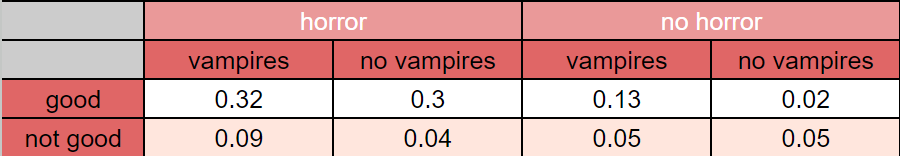


Jason wants to know more specific probability values. For example, what is the probability he will like the movie if it has vampires in it? He wants to use this information to guide future movie choices. You will be making a MovieProbability class to answer his questions.

You will be graded on the following:


*  Complete the methods specified in the class comments. (40pts)
*  Calculate the probabilities specified below using the methods you created. (10pts)




### [40pts] Method Completion
* **[5pts]** DataFrame creation
* **[5pts]** Create a method that finds the probability Jason likes or dislikes a movie.
* **[5pts]** Create a method that can calculate the joint probability of two variables, vampire and horror P(vampire ∧ horror).
* **[10pts]**  Create a method that can calculate the conditional probability of two variables verdict and horror, or verdict and vampire.
* **[5pts]** Create a method to calculate a conditional probability with a joint distribution of two events. For example, P(vampire ∧ horror | good).
* **[10pts]** Create a method to apply Bayes' rule and calculate the conditional probability of an event given the occurrence of other events. For example, P(good|vampire ∧ horror)

While we provide you with an outline of the methods, you may merge/change the methods in any way that makes sense for your code as long as you fulfill the requirements above and are able to compute the required probabilities.

In [10]:
import pandas as pd

class MovieProbability:
    def __init__(self):
        self.df = pd.DataFrame({
            'verdict': ['good', 'bad'],
            'H-vampire': [0.32, 0.09],
            'H-!vampire': [0.3, 0.04],
            '!H-vampire': [0.13, 0.05],
            '!H-!vampire': [0.02, 0.05]
        })
        self.df.set_index('verdict', inplace=True)

    def movieVerdict(self, verdict):
        total = self.df.sum().sum()
        return self.df.loc[verdict].sum() / total

    def jointProbability(self, verdict1, verdict2, variable, value):
        total = self.df.sum().sum()
        return self.df.loc[verdict1, variable] * self.df.loc[verdict2, variable] / total

    def conditionalMovieVerdict(self, verdictGood, vgv, vgnv, verdictBad, vbv, vbnv, value):
        goodHorror = self.df.loc[verdictGood, vgv] + self.df.loc[verdictGood, vgnv]
        badHorror = self.df.loc[verdictBad, vbv] + self.df.loc[verdictBad, vbnv]
        totalBad = goodHorror + badHorror
        return badHorror / totalBad

    def jointProbabilityConditional(self, verdict, vampire, horror):
        total = self.df.sum().sum()
        return (self.df.loc[verdict, vampire] * self.df.loc[verdict, horror]) / total

    def bayesRule(self, verdict, vampire, horror):
        total = self.df.sum().sum()
        return (self.df.loc[verdict, vampire] * self.df.loc[verdict, horror]) / (self.df.loc[verdict, vampire].sum() * self.df.loc[verdict].sum())

    def normalize_column(self, df, column_name):
        df[column_name] = df[column_name] / df[column_name].sum()
        return df

    def normalize_row(self, row_index):
        self.df.iloc[row_index, :] = self.df.iloc[row_index, :] / self.df.iloc[row_index, :].sum()
        return self.df

# Testing zone
mp = MovieProbability()




In [11]:
# Your DataFrame should look similar to the example below.
mp.df

,H-vampire,H-!vampire,!H-vampire,!H-!vampire
verdict,,,,
good,0.32,0.30,0.13,0.02
bad,0.09,0.04,0.05,0.05


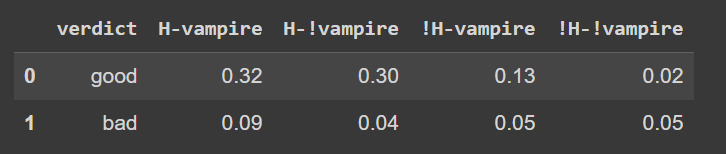

### [10pts] Calculate Probabilities
🟢Testing Zone🟢 Calculate the following probabilities:


* P(Good)
* P(Bad)
* P(Bad|Horror)
* P(Good|Not Horror)
* P(Bad|Not Vampire)
* P(vampire ∧ horror),
* P(vampire ∧ horror | good)
* P(!vampire ∧ !horror | good)
* P(good|vampire ∧ horror)
* P(bad| !vampire ∧ horror)

In [12]:
# Calculate Probabilities
print("P(Good):", mp.movieVerdict("good"))
print("P(Bad):", mp.movieVerdict("bad"))
print("P(Bad|Horror):", mp.conditionalMovieVerdict("good", "H-vampire",'H-!vampire', 'bad',"H-vampire",'H-!vampire', True))
print("P(Good|Not Horror):", mp.conditionalMovieVerdict("good", "!H-vampire", "!H-!vampire", 'bad', "H-vampire", "H-!vampire", False))
print("P(Bad|Not Vampire):", mp.conditionalMovieVerdict("bad","H-!vampire","!H-!vampire", 'good', "H-vampire", "H-!vampire", False))
print("P(vampire ∧ horror):", mp.jointProbability('good','bad','H-vampire',True))
print("P(vampire ∧ horror | good):", mp.jointProbabilityConditional("good", "H-vampire", "H-!vampire"))
print("P(!vampire ∧ !horror | good):", mp.jointProbabilityConditional("good", "!H-vampire", "!H-!vampire"))
print("P(good|vampire ∧ horror):", mp.bayesRule("good", "H-vampire", "H-!vampire"))
print("P(bad|!vampire ∧ horror):", mp.bayesRule("bad", "!H-vampire", "H-!vampire"))

P(Good): 0.77
P(Bad): 0.22999999999999998
P(Bad|Horror): 0.17333333333333334
P(Good|Not Horror): 0.46428571428571425
P(Bad|Not Vampire): 0.8732394366197184
P(vampire ∧ horror): 0.0288
P(vampire ∧ horror | good): 0.096
P(!vampire ∧ !horror | good): 0.0026000000000000003
P(good|vampire ∧ horror): 0.38961038961038963
P(bad|!vampire ∧ horror): 0.17391304347826086


# [50pts] Going for a Walk: Bayes Net Style

Bonnie likes to go on her daily walk, but whether she goes on walks can depend on whether it is raining, and whether she is too busy. If she does go on a walk, she sometime goes shopping as well, and she sometimes pets the local stray cats. However, sometimes her husband will get the shopping, or she will see a cat through her window and go downstairs to pet it without going on a walk.

We will use the following representation for each of these events:
* Raining = r
* Busy = b
* Petting stray = p
* Shopping = s
* Walk = w

Below, we see a Bayes Net that represents the probabilities of each event occurring.


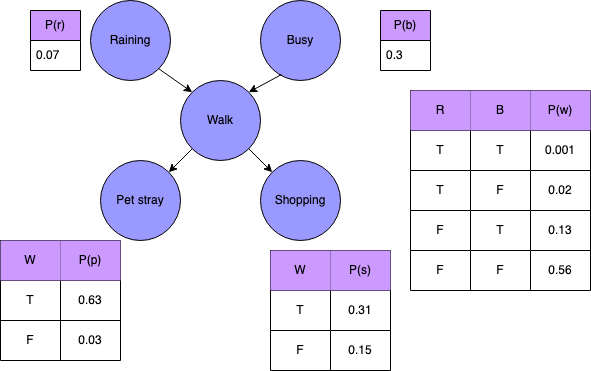

For this problem, answer the following question: Given that Bonnie pet a stray cat, and the shopping was done, what are the chances that it was raining?
P(r|p,s). You will be graded on the following:


*   [8pts] Represent Bayes net as a DataFrame
*   [2pts] Create a dictionary of Bayes Net Connections
*   [10pts] Create a method that retrieves any probability from the Bayes Net.
*   [20pts] Create a method that calculates the probability of P(r|p,s).
*   [10pts] Display all the probabilities you need to arrive at your answer for P(r|p,s) calculation, such as p(r), p(p|w), etc.




In [ ]:
import pandas as pd

class BayesNet:
    def __init__(self):
        # Create individual DataFrames for each variable
        self.bayesNet = {
            'r': pd.DataFrame({'prob': [0.07, 0.93]}, index=['True', 'False']),
            'b': pd.DataFrame({'prob': [0.3, 0.7]}, index=['True', 'False']),
            'p': pd.DataFrame({'prob': [0.63, 0.03]}, index=['True', 'False']),
            's': pd.DataFrame({'prob': [0.31, 0.15]}, index=['True', 'False']),
            'w': pd.DataFrame({'prob': [0.001, 0.56]}, index=['True', 'False'])
        }

        # Concatenate individual DataFrames along columns (axis=1)
        self.bayesNetCombined = pd.concat(self.bayesNet.values(), axis=1)

        # Add variable names as columns to the combined DataFrame
        self.bayesNetCombined.columns = [var for var in self.bayesNet.keys()]

        # Dictionary with variables as keys, and parents as the values
        self.bayesNetConnections = {
            'r': None,
            'b': None,
            'p': ['w'],
            's': ['w'],
            'w': ['b', 'r']
        }

    def findProbability(self, var, val=None, other_val=None):
        if self.bayesNetConnections[var] is None:
            return self.bayesNet[var]['prob'][0 if val == 'True' else 1]
        else:
            parent_vals = [val if parent == 'w' else other_val for parent in self.bayesNetConnections[var]]
            return self.bayesNet[var].loc[parent_vals]['prob'].prod()

    def calculate_final_total(self, total, total2):
        return total * total2

    def find_probability_rps(self):
        # Given that Bonnie pet a stray and went shopping, find P(r|p∧s)
        p_p_true = self.findProbability('p', 'True')  # P(p=True)
        p_s_true = self.findProbability('s', 'True')  # P(s=True)
        p_w_true = self.findProbability('w', 'True', 'False')  # P(w=True)
        p_r_true_w_true = self.findProbability('r', 'True', 'True')  # P(r=True|w=True)
        p_r_true_w_false = self.findProbability('r', 'True', 'False')  # P(r=True|w=False)

        # P(r=True|p=True∧s=True) = P(r=True|w=True) * P(w=True) / (P(p=True) * P(s=True))
        final_probability = self.calculate_final_total(p_r_true_w_true, p_w_true) / (p_p_true * p_s_true)

        return final_probability

    def print_combined_dataframe(self):
        # Display the combined DataFrame with variable names
        print("DataFrame for Bayes Net:")
        print(self.bayesNetCombined)
        print("\n")

# Create an instance of BayesNet
bn = BayesNet()

# Find the probability P(r|p∧s)
result = bn.find_probability_rps()
print(f"P(r|p∧s) = {result}\n")

# Print the combined DataFrame
bn.print_combined_dataframe()


P(r|p∧s) = 0.1124014336917563

DataFrame for Bayes Net:
          r    b     p     s      w
True   0.07  0.3  0.63  0.31  0.001
False  0.93  0.7  0.03  0.15  0.560




🟢Testing Zone🟢 Below, run the `find_probability_rps()` method to compute P(r|p∧s).

In [ ]:
bn = BayesNet()

# Given that Bonnie pet a stray and went shopping, find P(r|p∧s)
p_p_true = bn.findProbability('p', 'True')  # P(p=True)
p_s_true = bn.findProbability('s', 'True')  # P(s=True)
p_w_true = bn.findProbability('w', 'True', 'False')  # P(w=True)
p_r_true_w_true = bn.findProbability('r', 'True', 'True')  # P(r=True|w=True)
p_r_true_w_false = bn.findProbability('r', 'True', 'False')  # P(r=True|w=False)

# P(r=True|p=True∧s=True) = P(r=True|w=True) * P(w=True) / (P(p=True) * P(s=True))
final_probability = bn.calculate_final_total(p_r_true_w_true, p_w_true) / (p_p_true * p_s_true)

# Print all the probabilities used
print(f"P(p=True) = {p_p_true}")
print(f"P(s=True) = {p_s_true}")
print(f"P(w=True) = {p_w_true}")
print(f"P(r=True|w=True) = {p_r_true_w_true}")
print(f"P(r=True|w=False) = {p_r_true_w_false}")

# Print the final total
print(f"\nFinal Total: {final_probability}")


P(p=True) = 0.63
P(s=True) = 0.31
P(w=True) = 0.31360000000000005
P(r=True|w=True) = 0.07
P(r=True|w=False) = 0.07

Final Total: 0.1124014336917563


# [Extra Credit] Taking a Naive Walk

Now that you have worked with a complex Bayes Net, let's simplify it with a Naive Bayes assumption, conditional independence as shown the conditional probabilties. How do the complexity of the calculations compare? Using the conditional distribution table below, complete the given tasks.


| P(raining)  |  
| ----------- |
| 0.07        |

---

| raining      | P(walk) |
| ----------- | ----------- |
| True      | 0.04       |
| False   | 0.06        |


---


| raining      | P(busy) |
| ----------- | ----------- |
| True      | 0.3       |
| False   | 0.3        |

---


| raining      | P(pet stray) |
| ----------- | ----------- |
| True      | 0.02       |
| False   | 0.23        |

---

| raining      | P(shopping) |
| ----------- | ----------- |
| True      | 0.09       |
| False   | 0.1        |

## 🛑TASK 1

**[0.5 credit]** Create a Bayes network based on the Naive Bayes assumption, using the probabilities in the tables above. Upload your graph in the space below. You can generate the Bayes Net diagram either using drawing tools (PowerPoint, Google Slides, etc.) or hand-drawing.    

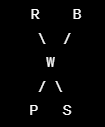

In this modified diagram:

R: Raining

B: Busy

W: Walk

P: Petting Stray

S: Shopping


Here, Rain (R) and Busy (B) both influence Walk (W), and Walk (W) subsequently influences Petting Stray (P) and Shopping (S).

## 🛑 TASK 2
**[0.5 credit]** Answer the following queries. Show your work to be eligible for partial credit.

[1] P(r, w, b, p, s)


>Query1: $P(r,w,b,p,s)$

$P(r,w,b,p,s)=P(r)⋅P(w∣r)⋅P(b)⋅P(p∣r)⋅P(s∣r)$

$P(r,w,b,p,s) = 0.07 * 0.06 * 0.7 * 0.02 * 0.09 $

$P(r,w,b,p,s) = 0.000005292$


[2] P(r, !w, !b, p, s)


>Query 2: $P(r,¬w,¬b,p,s)$

$P(r,¬w,¬b,p,s)=P(r)⋅P(¬w∣r)⋅P(¬b)⋅P(p∣r)⋅P(s∣r)$

$P(r,¬w,¬b,p,s)=0.07⋅(1−0.04)⋅(1−0.3)⋅0.02⋅0.09$

$P(r,¬w,¬b,p,s)=0.00084804$

[3] P(s)


> $P(s)=∑
r,w
​
 P(r,w,b,p,s)$

Calculate P(s) by summing over all possible combinations

result_query_3 = 0

#Iterate over all possible combinations of r, w

for r in ['True', 'False']:
    
    for w in ['True', 'False']:

        Simplified calculation using Naive Bayes assumptions
        result_query_3 += P_r * P_w_given_r * P_s_given_r if (w == 'True') else P_r * (1 - P_w_given_r) * (1 - P_s_given_r) if (w == 'False') else 0

result_query_3

result_query_3= 0.10099

[4] P(w)


> Query 4: $P(w)$

$P(w)=∑
r,b,p,s
​
 P(r,w,b,p,s)$

 # Calculate P(w) by summing over all possible combinations
result_query_4 = 0

# Iterate over all possible combinations of r, b, p, s
for r in ['True', 'False']:
    for w in ['True', 'False']:
        for b in ['True', 'False']:
            for p in ['True', 'False']:
                for s in ['True', 'False']:
                    # Simplified calculation using Naive Bayes assumptions
                    result_query_4 += P_r * P_w_given_r if (w == 'True') else P_r * (1 - P_w_given_r) if (w == 'False') else 0
                    result_query_4 *= P_b
                    result_query_4 *= P_p_given_r if (p == 'True') else (1 - P_p_given_r)
                    result_query_4 *= P_s_given_r if (s == 'True') else (1 - P_s_given_r)

result_query_4

#calculate the result

result_query_4= 0.2401



[5] P(b|s)


> Query 5: $P(b∣s)$

$P(b∣s)=
P(s)
P(b,s)
​
$

# Calculate P(b, s) and P(s)
result_query_5_b_s = 0
result_query_5_s = 0

# Iterate over all possible combinations of r, w, b, p

for r in ['True', 'False']:
    
        for w in ['True', 'False']:
        for b in ['True', 'False']:
            for p in ['True', 'False']:
                for s in ['True', 'False']:
                    # Simplified calculation using Naive Bayes assumptions
                    result_query_5_b_s += P_r * P_w_given_r if (w == 'True') else P_r * (1 - P_w_given_r) if (w == 'False') else 0
                    result_query_5_b_s *= P_b
                    result_query_5_b_s *= P_p_given_r if (p == 'True') else (1 - P_p_given_r)
                    result_query_5_b_s *= P_s_given_r if (s == 'True') else (1 - P_s_given_r)

                    result_query_5_s += P_r * P_w_given_r if (w == 'True') else P_r * (1 - P_w_given_r) if (w == 'False') else 0
                    result_query_5_s *= P_b
                    result_query_5_s *= P_p_given_r if (p == 'True') else (1 - P_p_given_r)
                    result_query_5_s *= P_s_given_r if (s == 'True') else (1 - P_s_given_r)

# Calculate the result
result_query_5 = result_query_5_b_s / result_query_5_s

result_query_5 = 0.2987.




#End of Homework

Image Cite:
https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/amar-terms-in-probability-01-1608711675.png